In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('steps.csv', delimiter=';')
df1.head()

id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1   2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2   3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        NaN        NaN        NaN        NaN        NaN        NaN   
4   5        NaN        NaN        NaN        NaN        NaN        NaN   

   26-6-2013  27-6-2013  28-6-2013  ...  4-5-2014  5-5-2014  6-5-2014  \
0     9929.0    12879.0    10541.0  ...       NaN       NaN       NaN   
1     4024.0     3926.0    14595.0  ...       NaN       NaN       NaN   
2     8185.0     9630.0     8983.0  ...    3914.0    4364.0       NaN   
3        NaN        NaN        NaN  ...       NaN       NaN       NaN   
4        NaN        NaN        NaN  ...       NaN       NaN       NaN   

   7-5-2014  8-5-2014  9-5-2014  10-5-2014  11-5-2014  12-5-2014  13-5-2014  
0       NaN       NaN       NaN        NaN        NaN        NaN        NaN  
1       NaN       NaN       NaN        NaN        NaN        NaN        NaN  
2       NaN       NaN    6227.0     4567.0     2567.0     1129.0        NaN  
3       NaN       NaN       NaN        NaN        NaN        NaN        NaN  
4       NaN       NaN       NaN        NaN        NaN        NaN        NaN  

[5 rows x 329 columns]

In [2]:
df2 = pd.read_csv('survey.csv')
df2["height"].describe()
# df2.head()

count    928.000000
mean     171.668103
std        9.080235
min      145.000000
25%      165.000000
50%      172.000000
75%      179.000000
max      195.000000
Name: height, dtype: float64

# Weekly assignment 1: exploratory data analysis

### Data cleaning ###

In [3]:
# 1. Read in and merge the two data sets (tip: think of different CSV formats that exist)
df = df2.merge(df1, on='id')
df.head()

id         city  gender    age  hh_size  education          education_1  \
0   1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1   2        Lille    Male  35-44        1          3             Bachelor   
2   3  Montpellier    Male  25-34        2          2  Master or doctorate   
3   4         Lyon    Male    <25        1          1             Bachelor   
4   5  Montpellier  Female  25-34        3          4             Bachelor   

   height  weight  20-6-2013  ...  4-5-2014  5-5-2014  6-5-2014  7-5-2014  \
0   178.0    98.0        NaN  ...       NaN       NaN       NaN       NaN   
1   180.0    77.0        NaN  ...       NaN       NaN       NaN       NaN   
2   180.0    83.0        NaN  ...    3914.0    4364.0       NaN       NaN   
3   178.0    80.0        NaN  ...       NaN       NaN       NaN       NaN   
4   167.0    61.0        NaN  ...       NaN       NaN       NaN       NaN   

   8-5-2014  9-5-2014  10-5-2014  11-5-2014  12-5-2014  13-5-2014  
0       NaN       NaN        NaN        NaN        NaN        NaN  
1       NaN       NaN        NaN        NaN        NaN        NaN  
2       NaN    6227.0     4567.0     2567.0     1129.0        NaN  
3       NaN       NaN        NaN        NaN        NaN        NaN  
4       NaN       NaN        NaN        NaN        NaN        NaN  

[5 rows x 337 columns]

In [4]:
# 2. Clean the data: remove impossible values
df = df[(df["weight"]< 200) & (df["weight"] > 35)]
df = df.fillna(0)
df.head()

# 3. Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 
df["Means steps per participant"] = df.loc[:, "20-6-2013":].mean(axis=1).round(2)

# 4. Show the head() of the resulting data frame
df.head()
df.describe()

id     hh_size   education      height      weight  \
count  924.000000  924.000000  924.000000  924.000000  924.000000   
mean   464.225108    2.339827    2.525974  171.540043   72.284632   
std    267.681497    1.226864    1.273267   10.668933   15.453637   
min      1.000000    1.000000    1.000000    0.000000   37.000000   
25%    232.750000    1.000000    1.000000  165.000000   61.000000   
50%    464.500000    2.000000    2.000000  172.000000   71.000000   
75%    695.250000    3.000000    4.000000  179.000000   81.000000   
max    929.000000   11.000000    5.000000  195.000000  155.000000   

          20-6-2013     21-6-2013     22-6-2013     23-6-2013     24-6-2013  \
count    924.000000    924.000000    924.000000    924.000000    924.000000   
mean      94.608225   2342.581169   3238.246753   2357.580087   3070.409091   
std      851.578749   5139.210099   6043.226719   5134.351360   5174.563346   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000    338.000000   4871.000000   2466.750000   5707.500000   
max    11157.000000  44944.000000  39165.000000  40392.000000  29862.000000   

       ...      5-5-2014      6-5-2014      7-5-2014      8-5-2014  \
count  ...    924.000000    924.000000    924.000000    924.000000   
mean   ...    582.292208    511.169913    598.188312    382.332251   
std    ...   2569.184980   2349.675324   2884.088571   2359.914861   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...  26654.000000  26660.000000  38400.000000  37530.000000   

           9-5-2014     10-5-2014     11-5-2014     12-5-2014  13-5-2014  \
count    924.000000    924.000000    924.000000    924.000000      924.0   
mean     735.410173    708.741342    596.623377    536.109307        0.0   
std     3241.397025   2776.281220   3148.097942   2302.266645        0.0   
min        0.000000      0.000000      0.000000      0.000000        0.0   
25%        0.000000      0.000000      0.000000      0.000000        0.0   
50%        0.000000      0.000000      0.000000      0.000000        0.0   
75%        0.000000      0.000000      0.000000      0.000000        0.0   
max    33379.000000  27605.000000  36031.000000  33660.000000        0.0   

       Means steps per participant  
count                   924.000000  
mean                   2347.462738  
std                    2413.876231  
min                       0.000000  
25%                     433.905000  
50%                    1660.180000  
75%                    3488.757500  
max                   19430.240000  

[8 rows x 334 columns]

### Exploratory data analysis ###

#### An analysis of mean steps per participant: ####

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


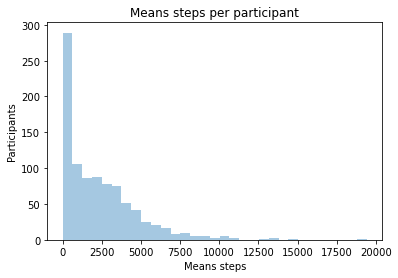

In [5]:
# 5. Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
df['Means steps per participant'].name = 'Means steps per participant' #Labeling the variable for plotting
file_size = df['Means steps per participant'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(file_size, kde=False) 
plt.title('Means steps per participant')
plt.ylabel('Participants')
plt.xlabel('Means steps')
plt.show()

2412.5696673378434
The median of graph is: 1660.18
The mean of this graph is: 2347.4627380952384
The standard deviation of graph is: 2412.5696673378434
Verbal description, Normality: Variation: Modality: Skewness: Outliers:


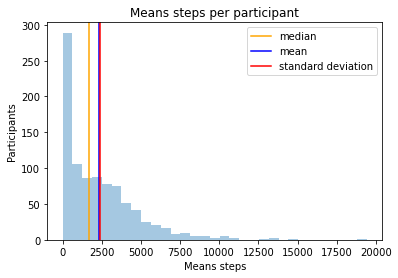

In [6]:
# 6. Summary statistics (measure of central tendency and variation, e.g., mean, median, standard deviation)
mean_steps = df['Means steps per participant'].mean()
median_steps = df['Means steps per participant'].median()
standard_deviation = np.std(df['Means steps per participant'])
print (standard_deviation)


print(f'The median of graph is: {median_steps}')
print(f'The mean of this graph is: {mean_steps}')
print(f'The standard deviation of graph is: {standard_deviation}')
print ("Verbal description, Normality: Variation: Modality: Skewness: Outliers:")



df['Means steps per participant'].name = 'Means steps per participant' #Labeling the variable for plotting
graph = df['Means steps per participant'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(graph, kde=False) 
plt.title('Means steps per participant')
plt.axvline(median_steps, 0, 100, color='orange', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_steps, 0, 100, color='blue', label='mean') 
plt.axvline(standard_deviation, 0, 100, color='red', label='standard deviation') 
plt.ylabel('Participants')
plt.xlabel('Means steps')
plt.legend()
plt.show()

In [7]:
# 7. Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.
# Look below

### We can characterize the distribution as follows:
* Normality: The distribution is in a certain extent normal.
* Variation: There is somewhat variation. The values are mostly 0.
* Modality: There is one peak.
* Skewness: The distribution in this case is skewed to the left
* Outliers: There are couple of outliers between 12500 and 20000.

['Bordeaux' 'Lille' 'Montpellier' 'Lyon']


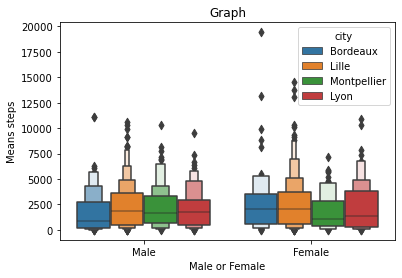

In [8]:
df["city"]
unique = df['city'].unique()
print (unique)

# 8. Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
sns.boxenplot(y="Means steps per participant", x="gender", hue="city", data=df)
plt.title('Graph')
plt.ylabel('Means steps')
plt.xlabel('Male or Female')
plt.show()


In [9]:
# 10. Describe and interpret the results
# Look Below

## Results:

In Lille, men and women take the most steps of the four cities. Lille is the most active of the four cities in this regard. The number of cities with the fewest steps varies between men and women. For the women it is Montepellier and for the men it is Bordeaux.

# Weekly assignment 2: correlation

## Feature engineering ##

     weight  Means steps per participant        BMI
0      98.0                      5133.88  30.930438
1      77.0                      2826.37  23.765432
2      83.0                      3745.90  25.617284
3      80.0                       221.54  25.249337
4      61.0                       874.56  21.872423
..      ...                          ...        ...
924    59.0                      1742.91  21.671258
925    90.0                       731.69  24.414062
926    71.0                      6268.95  21.672110
927    65.0                      3872.12  21.971336
928    76.0                      3167.90  23.456790

[922 rows x 3 columns]


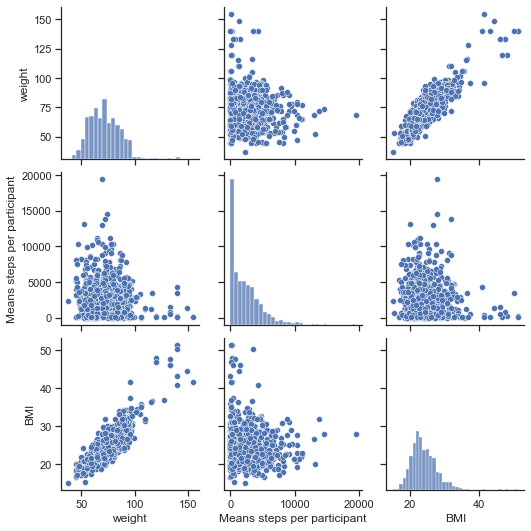

                               weight  Means steps per participant       BMI
weight                       1.000000                    -0.086396  0.863813
Means steps per participant -0.086396                     1.000000 -0.054819
BMI                          0.863813                    -0.054819  1.000000


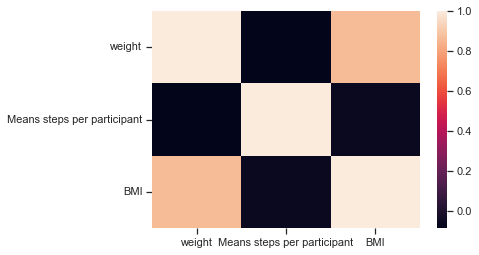

In [10]:
# 11. The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.
# Calculating the BMI
df['BMI'] = df['weight'] / (df['height']/100)**2

# Here I delete all the BMI above 51 beceause this is the max.
df = df[df["BMI"] < 52]
df['BMI'].describe()

df_subset = df[['weight', 'Means steps per participant','BMI']]
print (df_subset)

# 12. Make a scatterplot matrix of the numerical variables
# Scatterplot matrix
sns.set_theme(style="ticks")
sns.pairplot(df_subset)
plt.show()

# 13. Make a correlation matrix of the numerical variables
# Correlation matrix
correlation_matrix = df_subset.corr()
print (correlation_matrix)

# Heathmap
dataplot=sns.heatmap(df_subset.corr())
plt.show()

In [11]:
# 14. Describe and interpret the results
# Look below

### Results Correlation and scatterplot matrix

The correlation matrix indicates that the variables "Means steps per participant" and "weight" do not correlate with one another. The distribution is primarily left-skew. Additionally, the scatterplot reveals that the participants who took the most steps were about 50 kg and 80 kg, although these individuals are outliers. Other outliers are the participants with a higher weight and also with way less steps.

# Weekly assignment 3: linear regression

## Predictive model

In [12]:
# 15. Explain linear regression in your own words

### Explanation Linear Regression ##

A linear regression enables you to predict the dependent variable, to predict this value you need numeric independent variables. To perform a linear regression, you can use different envoriments like Sklearn and MATLAB.

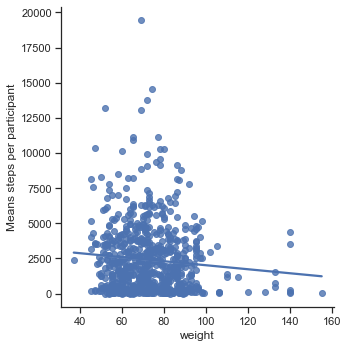

Result prediction  Means steps per participant
188        2182.661084                        30.55
849        1965.301973                      4143.53
633        2367.983407                      5577.18
30         1953.938441                         7.43
590        1185.369853                      1126.66
..                 ...                          ...
797        2248.153710                      1478.73
599        2025.407944                      1789.67
545        2626.213025                      3346.94
445        2324.200841                      2642.91
610         757.729649                       253.51

[185 rows x 2 columns]

In [13]:
# 16. Create dummy variables for the categorical variables
numerical = pd.get_dummies(df[["city","gender","age","education_1"]])
df_new = pd.concat([df, numerical], axis=1, join='inner')

# 17. Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).
train, test = train_test_split(df_new, test_size=0.2)


sns.lmplot(x="weight", y="Means steps per participant",data=train,ci=False)
plt.xlabel("weight")
plt.ylabel("Means steps per participant")
plt.show()

x = test[["weight",'height','gender_Female', 'gender_Male', 'age_25-34',  'age_35-44', 'age_45-54', 'age_55-64', 'age_65+']] 
y = test["Means steps per participant"]

# Here we create a model
lm = LinearRegression() 
lm.fit(x,y)

# We take the "x" because we want to predict something based on the columns "x"
test["Result prediction"] = lm.predict(x)

test[['Result prediction','Means steps per participant']]

## Evaluation ###

In [14]:
# 18. Predictive power of the model (R2)

r2_score(test['Means steps per participant'],test['Result prediction'])


0.09805548289661348

In [15]:
# 19. Predictive power of the model (RMSE)
import math

math.sqrt(mean_squared_error(test['Means steps per participant'],test['Result prediction']))

2077.0956462762783

In [16]:
# 20. Investigate the residuals
test["Residuals"] = test["Means steps per participant"] - test["Result prediction"]

test["Residuals"].head()


188   -2152.111084
849    2178.228027
633    3209.196593
30    -1946.508441
590     -58.709853
Name: Residuals, dtype: float64

In [17]:
# Describe and interpret the results
# Conclusion
# Look below

### Results & conclusion ###

We see the prediction of steps in new columns titled "Result prediction" after the linear regression model has been established. According to the R2 model, the linear regression model has a 5% accuracy rate. The prediction model's root-mean-square error (RMSE) revealed that it is incredibly incorrect. In other words, the dataset's incompleteness (many 0 values) is the reason the prediction model is not performing as intended.